## Analisando preço casas de cidades brasileiras

Estarei analisando preço de casas de algumas cidades brasileiras e a partir disso, criar um modelo preditivo que avalia o preço total.
Por fim, irei plotar um mapa dos estados e estarão coloridos a partir de seus preços. 
Os dados foram obtidos no site Kaggle.
*Vale ressaltar que os dados obtidos possuem uma certa limitação no sentido que existem poucas cidades no arquivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import geopandas as gpd
init_notebook_mode(connected=True)

In [3]:
cb1= pd.read_csv('houses_to_rent.csv')

In [4]:
cb1.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [5]:
cb2=pd.read_csv('houses_to_rent_v2.csv')

In [6]:
cb2

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [7]:
cb2.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


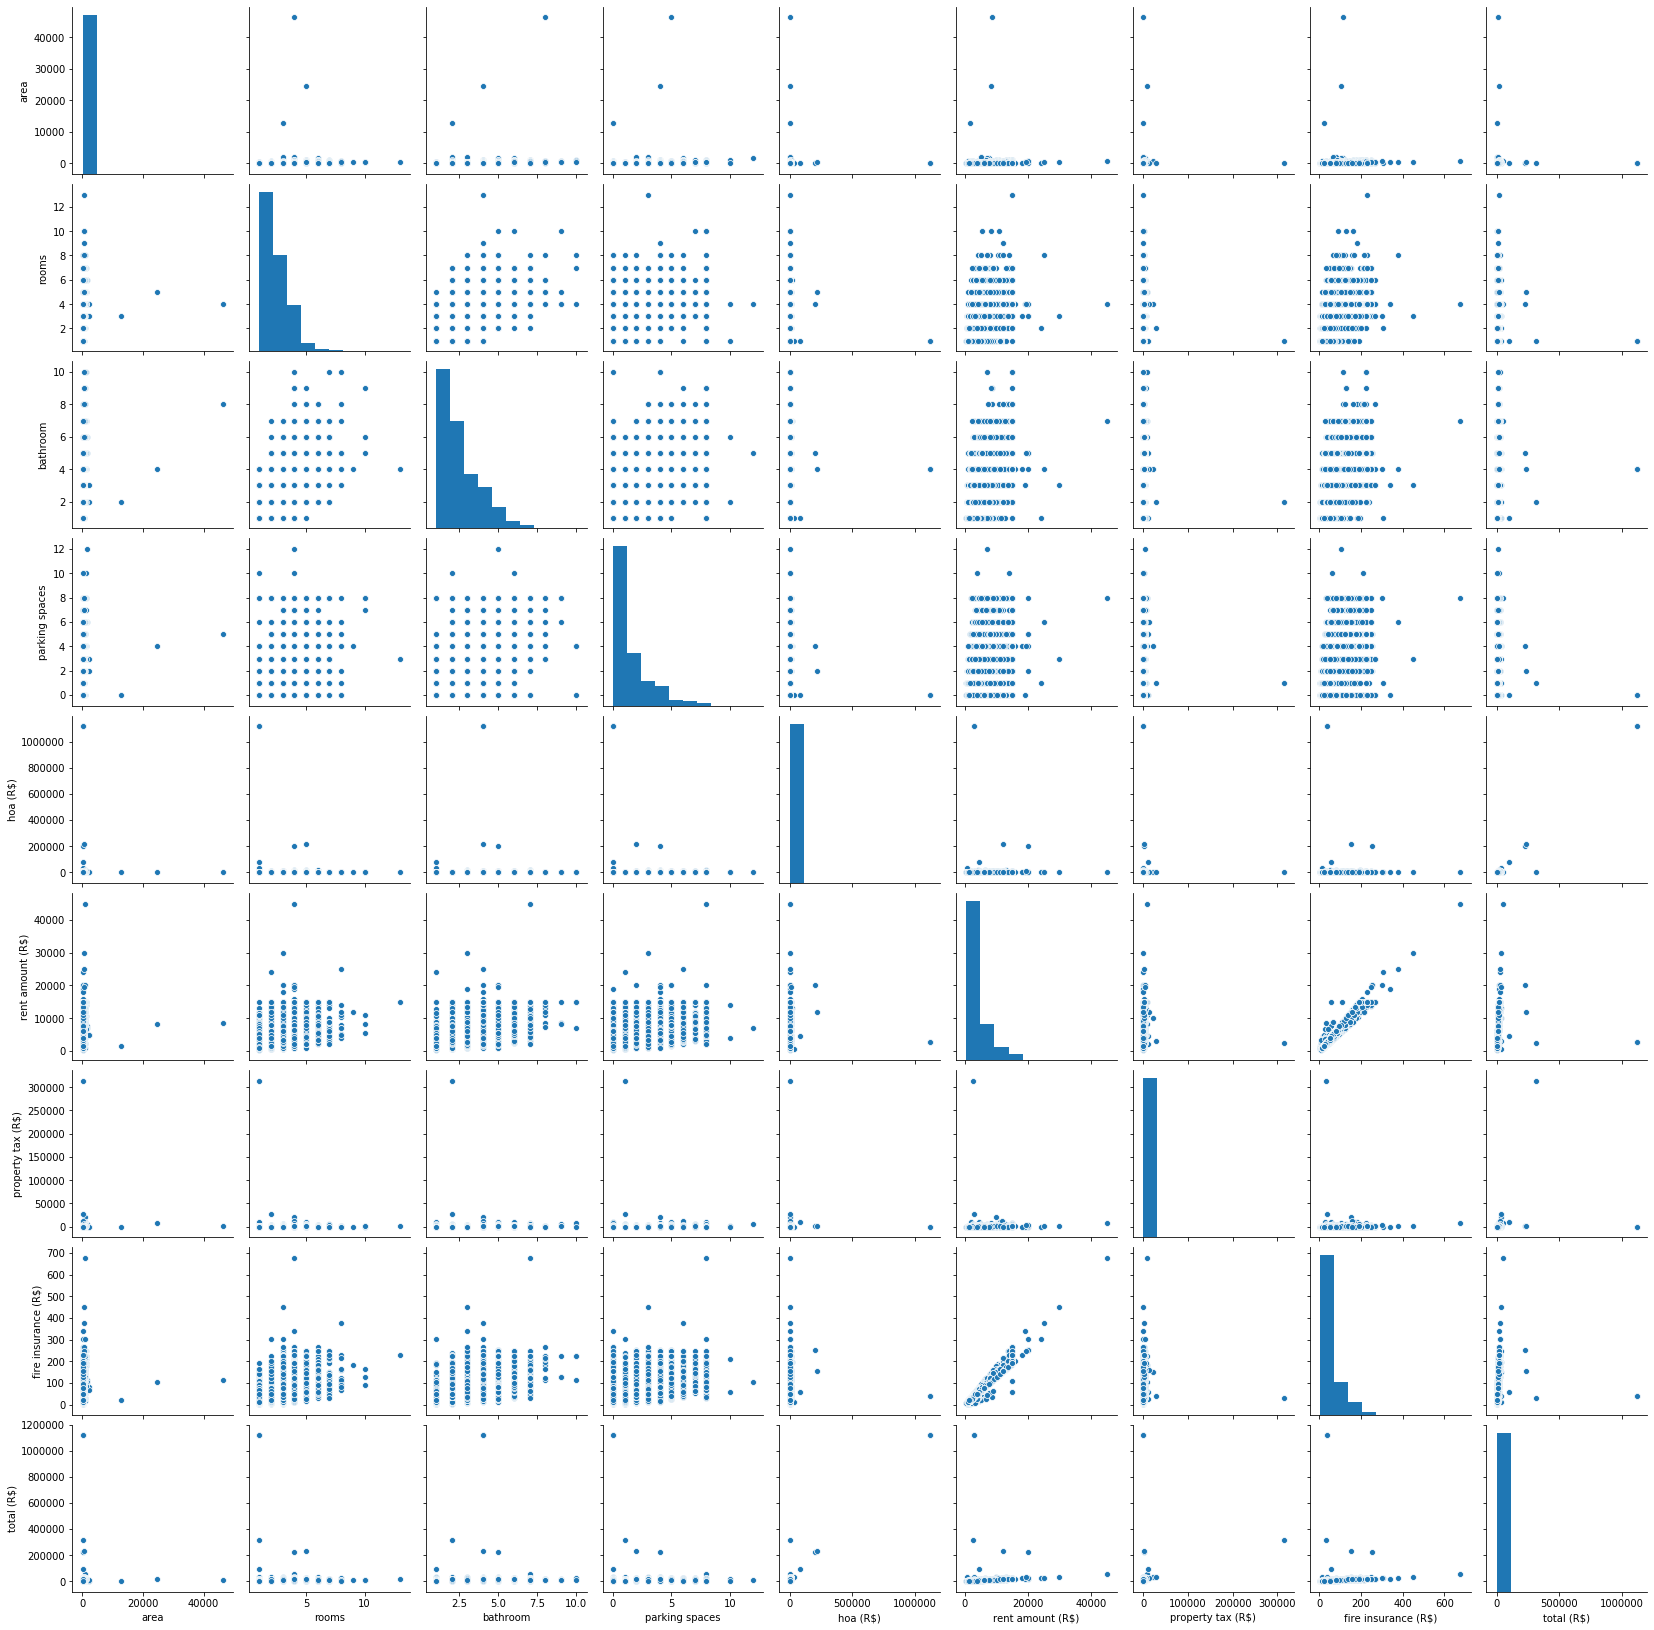

In [8]:
sns.pairplot(cb2)

In [9]:
cb2.corr()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.193796,0.226766,0.193983,0.006890,0.180742,0.039059,0.188078,0.051799
rooms,0.193796,1.000000,0.733763,0.617510,0.007139,0.541758,0.075252,0.565148,0.134597
bathroom,0.226766,0.733763,1.000000,0.697379,0.050271,0.668504,0.109253,0.676399,0.208339
parking spaces,0.193983,0.617510,0.697379,1.000000,0.009321,0.578361,0.098378,0.597348,0.148684
hoa (R$),0.006890,0.007139,0.050271,0.009321,1.000000,0.036490,0.007627,0.029535,0.955024
rent amount (R$),0.180742,0.541758,0.668504,0.578361,0.036490,1.000000,0.107884,0.987343,0.264490
property tax (R$),0.039059,0.075252,0.109253,0.098378,0.007627,0.107884,1.000000,0.105661,0.218344
fire insurance (R$),0.188078,0.565148,0.676399,0.597348,0.029535,0.987343,0.105661,1.000000,0.254911
total (R$),0.051799,0.134597,0.208339,0.148684,0.955024,0.264490,0.218344,0.254911,1.000000


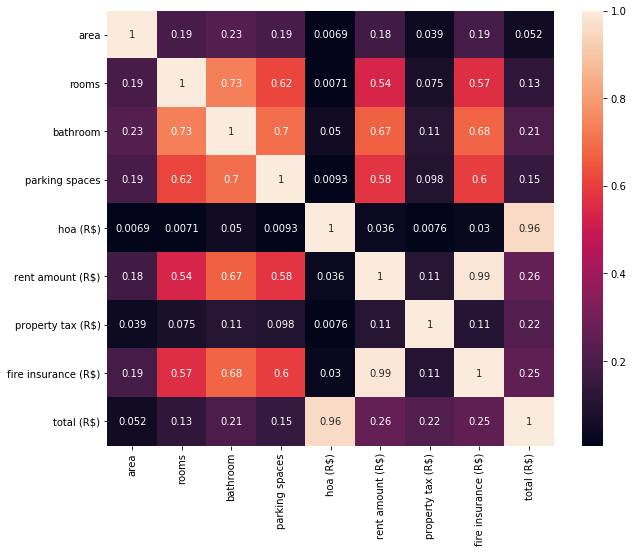

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(cb2.corr(),annot=True)

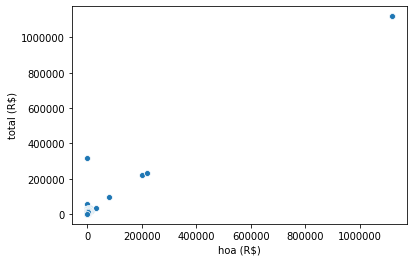

In [12]:
sns.scatterplot(data=cb2,y='total (R$)',x='hoa (R$)')

In [13]:
cb2[cb2['hoa (R$)']==1.117000e+06]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000


In [14]:
cb2.drop([255,6979],inplace=True)

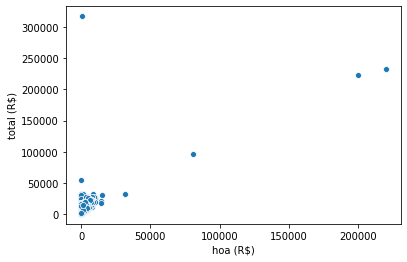

In [15]:
sns.scatterplot(data=cb2,y='total (R$)',x='hoa (R$)')

Essas etapas consistem em retirar os outliers de nossos dados para que não interfiram na análise

In [16]:
cb2[cb2['total (R$)']==1.120000e+06]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)


In [19]:
cb2['total (R$)'].max()

316900

In [20]:
cb2[cb2['total (R$)']==316900]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900


Essas etapas 

In [21]:
cb2.drop(6645,inplace=True)

In [22]:
cb2[cb2['total (R$)']==233200]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200


In [23]:
cb2.drop(6230,inplace=True)

In [24]:
cb2.drop(2859,inplace=True)

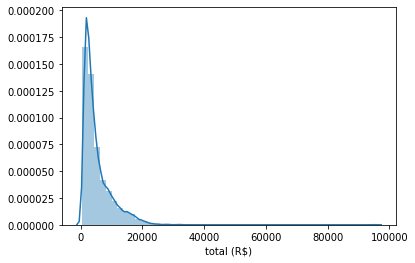

In [25]:
sns.distplot(cb2['total (R$)'])

Transformando animais e imobiliado em valores numéricos

In [27]:
animals = pd.get_dummies(cb2['animal'],drop_first=True)
furnitures = pd.get_dummies(cb2['furniture'],drop_first=True)

In [28]:
cb2.drop(['animal','furniture'],axis=1,inplace=True)

In [29]:
cb2

,city,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,1585,12000,279,155,14020


In [30]:
cb2['no animals']= animals

In [31]:
cb2

,city,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),no animals
0,São Paulo,70,2,1,1,7,2065,3300,211,42,5618,0
1,São Paulo,320,4,4,0,20,1200,4960,1750,63,7973,0
2,Porto Alegre,80,1,1,1,6,1000,2800,0,41,3841,0
3,Porto Alegre,51,2,1,0,2,270,1112,22,17,1421,0
4,São Paulo,25,1,1,0,1,0,800,25,11,836,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,402,1478,24,22,1926,1
10688,São Paulo,285,4,4,4,17,3100,15000,973,191,19260,0
10689,Rio de Janeiro,70,3,3,0,8,980,6000,332,78,7390,1
10690,Rio de Janeiro,120,2,2,2,8,1585,12000,279,155,14020,0


In [32]:
cb2['no furniture']= furnitures

In [33]:
cb2

,city,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),no animals,no furniture
0,São Paulo,70,2,1,1,7,2065,3300,211,42,5618,0,0
1,São Paulo,320,4,4,0,20,1200,4960,1750,63,7973,0,1
2,Porto Alegre,80,1,1,1,6,1000,2800,0,41,3841,0,1
3,Porto Alegre,51,2,1,0,2,270,1112,22,17,1421,0,1
4,São Paulo,25,1,1,0,1,0,800,25,11,836,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,402,1478,24,22,1926,1,0
10688,São Paulo,285,4,4,4,17,3100,15000,973,191,19260,0,1
10689,Rio de Janeiro,70,3,3,0,8,980,6000,332,78,7390,1,0
10690,Rio de Janeiro,120,2,2,2,8,1585,12000,279,155,14020,0,0


In [34]:
cb2.dropna(inplace=True)

In [35]:
cb2 = cb2[cb2!= '-']

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [36]:
cb2.dropna(inplace=True)

### Modelo preditivo utilizando regressão linear

In [38]:
X= cb2[['area','rooms','bathroom', 'parking spaces', 'floor', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'no animals','no furniture']]
y= cb2['total (R$)']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print(lm.intercept_)

0.4579728540211363


In [45]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
area,-0.001458
rooms,-0.122140
bathroom,0.252686
parking spaces,-0.018835
floor,-0.039207
hoa (R$),0.999955
rent amount (R$),1.000396
property tax (R$),0.999877
fire insurance (R$),0.970823
no animals,-0.335946


In [46]:
predictions = lm.predict(X_test)

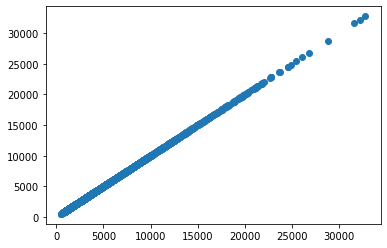

In [47]:
plt.scatter(y_test,predictions)

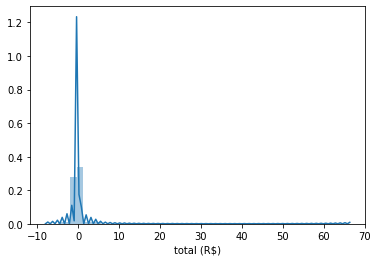

In [48]:
sns.distplot((y_test-predictions),bins=50);

In [49]:
lm.predict(X)

array([ 5618.03582287,  7972.81987851,  3841.31758063, ...,
       19264.16899239,  7390.11607719, 14019.32215992])

In [50]:
from sklearn import metrics

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6715374827654665
MSE: 3.275465030621791
RMSE: 1.8098245855943584


In [52]:
cb2.sort_values(by='total (R$)', ascending=False)

,city,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),no animals,no furniture
2928,Rio de Janeiro,35,1,1,0,1,81150,4500,9900,58,95610,0,0
1444,Porto Alegre,42,1,1,0,10,32000,700,40,11,32750,0,1
6243,Rio de Janeiro,95,2,2,1,11,1024,3000,28120,39,32180,0,1
6185,São Paulo,455,4,5,4,5,8500,19500,3334,248,31580,0,1
1862,São Paulo,560,4,4,7,2,8600,15000,5000,191,28790,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,Belo Horizonte,30,1,1,0,2,0,525,25,7,557,0,1
4294,Belo Horizonte,20,1,1,0,1,0,500,42,7,549,1,1
10218,Belo Horizonte,25,1,1,1,1,0,500,38,7,545,1,1
5876,Rio de Janeiro,30,1,1,1,3,0,500,0,7,507,0,1


In [53]:
x=cb2.groupby(['city']).sum()
x

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),no animals,no furniture
city,,,,,,,,,,,
Belo Horizonte,160973,2531,1982,1514,677491,2694538,232134,36164,3640669,259.0,781.0
Campinas,70311,1386,1101,767,480526,1257070,72697,16158,1826462,134.0,552.0
Porto Alegre,83382,1975,1563,863,560623,2038635,102283,30251,2731810,162.0,725.0
Rio de Janeiro,138859,3065,2396,1010,1600418,4428215,357793,57360,6443802,282.0,1001.0
São Paulo,570914,10310,9899,7068,6247369,19027179,1755970,241926,27273752,1068.0,2916.0


In [54]:
b1 = pd.DataFrame({'city': ['Belo Horizonte','Campinas','Porto Alegre','Rio de Janeiro','São Paulo'],
                   'total (R$)':[3640669, 1826462, 2731810, 6443802, 27273752]})

In [55]:
import folium

In [56]:
b2= pd.DataFrame({'estado': ['MG','SP','RJ'],
                   'total (R$)':[3640669+2731810, 27273752+1826462, 6443802]})

In [57]:
b2

,estado,total (R$)
0,MG,6372479
1,SP,29100214
2,RJ,6443802


In [58]:
ufs= gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')

Estado:Paraná


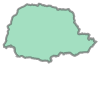

In [59]:
print('Estado:' + ufs.nome[2])
ufs.geometry[2]

In [60]:
ufs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   nome                 27 non-null     object  
 1   nomeabrev            0 non-null      object  
 2   geometriaaproximada  27 non-null     object  
 3   sigla                27 non-null     object  
 4   geocodigo            27 non-null     object  
 5   id_produtor          27 non-null     int64   
 6   id_elementoprodutor  0 non-null      object  
 7   cd_insumo_orgao      11 non-null     float64 
 8   nr_insumo_mes        0 non-null      object  
 9   nr_insumo_ano        0 non-null      object  
 10  tx_insumo_documento  0 non-null      object  
 11  geometry             27 non-null     geometry
dtypes: float64(1), geometry(1), int64(1), object(9)
memory usage: 2.7+ KB


In [61]:
ufs.rename({'sigla':'estado'}, axis=1,inplace=True)

In [62]:
ufs

,nome,nomeabrev,geometriaaproximada,estado,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."
5,Alagoas,None,Sim,AL,27,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ..."
6,Tocantins,None,Sim,TO,17,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ..."
7,Roraima,None,Sim,RR,14,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5..."
8,Amazonas,None,Sim,AM,13,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1..."
9,Acre,None,Sim,AC,12,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ..."


In [63]:
Cp= ufs.merge(b2,on= 'estado', how='left')

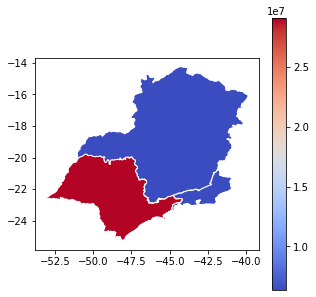

In [64]:
Cp.plot(column='total (R$)',
       cmap='coolwarm',
       figsize=(5,5),
       legend= True,
       edgecolor='White')